# Prepare Historical DataSet

In [1]:
import json
import re
import seaborn as sns
import pandas as pd

## Load in Basic DataFrame

In [2]:

general_df = pd.read_json("tweets.json", lines = True)
user_df = pd.json_normalize(general_df['user'])
entities_df = pd.json_normalize(general_df['entities'])


general_df['Hashtags'] = general_df['full_text'].apply(lambda x: re.findall(r"#(\w+)", x))
general_df['Mentions'] = general_df['full_text'].apply(lambda x: re.findall(r"@(\w+)", x))
general_df['URLS'] = general_df['full_text'].apply(lambda x: re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x))

In [3]:
user_df.head()


,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,...,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,entities.description.urls,entities.url.urls
0,1022750460086820864,1022750460086820864,Smart Green,Enviato1,"Pune, India",Smart Green is a social initiative to promote ...,None,False,19,29,...,False,False,False,False,False,False,False,none,[],NaN
1,71834468,71834468,Dr Venkatesh,bangalorerobot,"Bengaluru, India",Finalist: NOAA Bonus Prize\n\nSemifinalist: \...,https://t.co/WvOiLum3PX,False,1342,4783,...,True,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/WvOiLum3PX', 'expanded_..."
2,803391058411331584,803391058411331584,Gilles Testart,GillesTestart,,,None,False,178,416,...,True,False,True,True,False,False,False,none,[],NaN
3,13886002,13886002,Ryusho 龍昇,ryusho,"Syracuse, NY",Nichiren Shu Buddhist Priest & Board Certified...,https://t.co/sdabBwr3T4,False,529,725,...,True,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/sdabBwr3T4', 'expanded_..."
4,3090116309,3090116309,BigWetP-word,TSBigMoney,Post-Reality,Very Important Businessman // Sandwich Analyst...,None,False,1556,917,...,True,False,True,False,False,False,False,none,[],NaN


In [4]:
general_df['user name'] = user_df['name']
general_df['screen name'] = user_df['screen_name']
general_df['location'] = user_df['location']
general_df['followers_count'] = user_df['followers_count']
general_df['friends_count'] = user_df['friends_count']

In [5]:
general_df.retweet_count

0          0
1          0
2        132
3       8574
4       8574
        ... 
2678      15
2679       1
2680       0
2681     257
2682       2
Name: retweet_count, Length: 2683, dtype: int64

## Load Columns We Actually want to look at 



In [6]:
relevant_columns = ['created_at', 'id', 'full_text', 'retweet_count', 'favorite_count', 'display_text_range','Hashtags','Mentions','URLS','followers_count', 'friends_count', 'user name','screen name','location']

In [7]:
tweet_data = general_df[relevant_columns]

In [8]:
tweet_data.head()

,created_at,id,full_text,retweet_count,favorite_count,display_text_range,Hashtags,Mentions,URLS,followers_count,friends_count,user name,screen name,location
0,2018-08-13 10:39:52+00:00,1028954283822260225,An eye-opening article. This further reinforce...,0,0,"[0, 146]",[],[EamonRyan],[https://t.co/kZHZCOKCsR],19,29,Smart Green,Enviato1,"Pune, India"
1,2018-08-13 10:39:54+00:00,1028954290893799428,Bangladesh Confronts Climate Change - book goe...,0,0,"[0, 83]",[],[],"[https://t.co/X5zgf9lYST, https://t.co/dowjnig...",1342,4783,Dr Venkatesh,bangalorerobot,"Bengaluru, India"
2,2018-08-13 10:39:58+00:00,1028954309004685312,RT @MrDenmore: If there’s a definition of insa...,132,0,"[0, 140]",[],[MrDenmore],[],178,416,Gilles Testart,GillesTestart,
3,2018-08-13 10:39:59+00:00,1028954309919158272,RT @KateAronoff: The scene in Jurassic Park wh...,8574,0,"[0, 140]",[],[KateAronoff],[],529,725,Ryusho 龍昇,ryusho,"Syracuse, NY"
4,2018-08-13 10:39:59+00:00,1028954312234422273,RT @KateAronoff: The scene in Jurassic Park wh...,8574,0,"[0, 140]",[],[KateAronoff],[],1556,917,BigWetP-word,TSBigMoney,Post-Reality


## Remove RT Rows

In [9]:
tweet_data = tweet_data[~tweet_data.full_text.str.contains("RT")]

In [10]:
tweet_data.head()

,created_at,id,full_text,retweet_count,favorite_count,display_text_range,Hashtags,Mentions,URLS,followers_count,friends_count,user name,screen name,location
0,2018-08-13 10:39:52+00:00,1028954283822260225,An eye-opening article. This further reinforce...,0,0,"[0, 146]",[],[EamonRyan],[https://t.co/kZHZCOKCsR],19,29,Smart Green,Enviato1,"Pune, India"
1,2018-08-13 10:39:54+00:00,1028954290893799428,Bangladesh Confronts Climate Change - book goe...,0,0,"[0, 83]",[],[],"[https://t.co/X5zgf9lYST, https://t.co/dowjnig...",1342,4783,Dr Venkatesh,bangalorerobot,"Bengaluru, India"
5,2018-08-13 10:40:00+00:00,1028954314490798080,Scientist calls out media ‘misinformation’ on ...,1,1,"[0, 98]",[],[],[https://t.co/wvaLlY54na],1533,1160,IL Family Institute,ProFamilyIFI,Illinois
6,2018-08-13 10:40:00+00:00,1028954314998509570,"In the latest edition of The Ripon Forum, @Col...",5,8,"[0, 180]",[],"[ColoradoStateU, airscottdenning]","[https://t.co/IFwD5pTHtr, https://t.co/2rzD3k7...",9150,876,The Ripon Society,RiponSociety,"Washington, DC"
7,2018-08-13 10:40:02+00:00,1028954321864601600,@GeneMcVay Help save the Sasquatch and nip glo...,6,7,"[11, 69]",[],[GeneMcVay],[],8311,7934,Arkansas World,ArkansasWorld,Arkansas


## Organize Topics Into Different DataFrames

In [22]:
#will want to do when made all lowercase

new = tweet_data[tweet_data.full_text.str.contains("parisagreement") == True]


SyntaxError: invalid syntax (<ipython-input-22-1b548beb76d6>, line 3)

## Clean Location Data

There has to be a way to make this faster using dataframe tricks 

In [11]:
from geopy.geocoders import Nominatim
from tqdm import tqdm

tqdm.pandas()

def geo_locator(user_location):
    
    # initialize geolocator
    geolocator = Nominatim(user_agent='Tweet_locator')

    if user_location is not None:
        try :
            # get location
            location = geolocator.geocode(user_location, language='en')
            # get coordinates
            location_exact = geolocator.reverse(
                        [location.latitude, location.longitude], language='en')
            # get country codes
            c_code = location_exact.raw['address']['country_code']

            return c_code

        except:
            return None

    else : 
        return None

# apply geo locator to user-location
loc = tweet_data['location'].progress_apply(geo_locator)
tweet_data['user-country_code'] = loc



/usr/local/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 852/852 [12:45<00:00,  1.11it/s]


In [12]:
tweet_data.head()

,created_at,id,full_text,retweet_count,favorite_count,display_text_range,Hashtags,Mentions,URLS,followers_count,friends_count,user name,screen name,location,user-country_code
0,2018-08-13 10:39:52+00:00,1028954283822260225,An eye-opening article. This further reinforce...,0,0,"[0, 146]",[],[EamonRyan],[https://t.co/kZHZCOKCsR],19,29,Smart Green,Enviato1,"Pune, India",in
1,2018-08-13 10:39:54+00:00,1028954290893799428,Bangladesh Confronts Climate Change - book goe...,0,0,"[0, 83]",[],[],"[https://t.co/X5zgf9lYST, https://t.co/dowjnig...",1342,4783,Dr Venkatesh,bangalorerobot,"Bengaluru, India",in
5,2018-08-13 10:40:00+00:00,1028954314490798080,Scientist calls out media ‘misinformation’ on ...,1,1,"[0, 98]",[],[],[https://t.co/wvaLlY54na],1533,1160,IL Family Institute,ProFamilyIFI,Illinois,us
6,2018-08-13 10:40:00+00:00,1028954314998509570,"In the latest edition of The Ripon Forum, @Col...",5,8,"[0, 180]",[],"[ColoradoStateU, airscottdenning]","[https://t.co/IFwD5pTHtr, https://t.co/2rzD3k7...",9150,876,The Ripon Society,RiponSociety,"Washington, DC",us
7,2018-08-13 10:40:02+00:00,1028954321864601600,@GeneMcVay Help save the Sasquatch and nip glo...,6,7,"[11, 69]",[],[GeneMcVay],[],8311,7934,Arkansas World,ArkansasWorld,Arkansas,us


## Clean Tweet Text Data

In [41]:
import sys
!{sys.executable} -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [43]:
import spacy

nlp = spacy.load('en')

def cleaner(string):
    
    # Generate list of tokens
    doc = nlp(string)
    lemmas = [token.lemma_ for token in doc]
    # Remove tokens that are not alphabetic 
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() 
                 or lemma == '-PRON-'] 
    # Print string after text cleaning
    return ' '.join(a_lemmas)

tweet_data['text_cleaned'] = \
                   tweet_data['full_text'].progress_apply(cleaner)

100%|██████████| 2683/2683 [00:22<00:00, 119.40it/s]
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


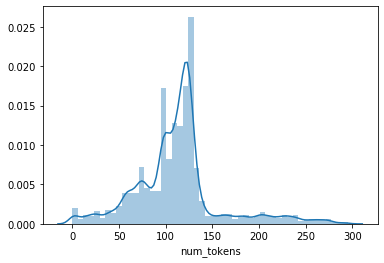

In [37]:
# Sum the number of tokens in each Doc
tweet_data['num_tokens'] = [len(token) for token in tweet_data.text_cleaned]
# Visualize histogram of tokens per tweet
g = sns.distplot(tweet_data.num_tokens)